[View in Colaboratory](https://colab.research.google.com/github/riyanagpal24/BreastCancer-SVM/blob/master/BC_SVM.ipynb)

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0) #random =0 for resuability

svm = SVC()
'''
To optimize the (achieve higher) accuracy of the parameters, we regularize them.

For regularisation following two parameters ar kept in check:
'C' : it classifies the degree of classification for each data set.
Gamma : controls the width of our guassian kernel
'''
svm.fit(x_train, y_train)
print("Accuracy on the training subset {:.3f}".format(svm.score(x_train, y_train))) # 100 : signifies we are over fitting the data
print("Accuracy on the test subset {:.3f}".format(svm.score(x_test, y_test))) # 62.9 

Accuracy on the training subset 1.000
Accuracy on the test subset 0.629


'\nlarge diff between the max and min value of each feature. A diff in order of mangnitude.\n'

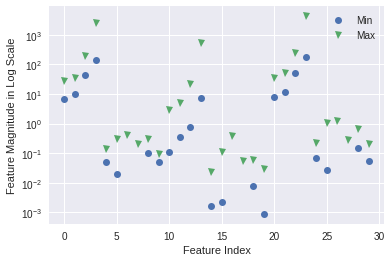

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(x_train.min(axis=0), 'o', label='Min')
plt.plot(x_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

'''
large diff between the max and min value of each feature. A diff in order of mangnitude.
'''

In [3]:
#to bring the features to the same scale(eg. 0-1 range)
#StandardScaler() or MinMaxScaler functions can be used.

min_train = x_train.min(axis =0) # axis = 0 - y axis

#min of each feature : subtract min from max
range_train = (x_train - min_train).max(axis = 0) # for y-aixs (represented in log values)

#to bring the data into the scale of 0 - 1
x_train_scaled = (x_train - min_train)/range_train

print('Minimum per feature\n{}'.format(x_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(x_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
x_test_scaled = (x_test - min_train)/range_train
#classifier is used with default parameters
svm = SVC()
svm.fit(x_train_scaled, y_train) #y_train are the labels so no need to scale

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
print("Accuracy on the training subset {:.3f}".format(svm.score(x_train_scaled, y_train))) #94.8 : underfitting of data
print("Accuracy on the test subset {:.3f}".format(svm.score(x_test_scaled, y_test))) # 95.1 

Accuracy on the training subset 0.948
Accuracy on the test subset 0.951


In [6]:
#try to improve accuracy by adjusting hyper-parameter

svm = SVC(C=1000) #C=1000 leads to a more complex and classified model
svm.fit(x_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(x_train_scaled, y_train))) # 98.8 (no under or over fitting)
print('The accuracy on the test subset: {:.3f}'.format(svm.score(x_test_scaled, y_test))) #97.2

The accuracy on the training subset: 0.988
The accuracy on the test subset: 0.972


In [12]:
#Uncertainity estimation : by decision function
#decision function determines on which side of the hyper-plane the feature lies.

#probability of malignant or bening tumor for the first 20 samples
print('The decision function is:\n\n{}\n'.format(svm.decision_function(x_test_scaled)[:20]))

#decision in boolean factor : tumor beningn or not
print('Thresholded decision function:\n\n{}\n'.format(svm.decision_function(x_test_scaled)[:20]>0))

#classes differentiation 0: malignant(negative values)  1: benign(positive values) 
svm.classes_

The decision function is:

[ -4.85978922   1.99579027   3.72514352   2.2759514    4.90872748
   3.38738403   5.5791361    3.65809059   4.35247953   7.58641901
   1.03844859   1.83665248   6.57010973   0.18802654   0.78505785
  -3.91506363   3.36498378  -8.28312921  -7.22330097 -13.2443725 ]

Thresholded decision function:

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False False False]



array([0, 1])

In [13]:
#Uncertainity estimation : predicting probability
svm


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
#predict_proba : uncertainity estimation
svm = SVC(C=1000, probability=True)
svm.fit(x_train_scaled, y_train)

#calculated probability for both class[0,1]
print('Predicted probabilities for the samples (malignant and benign):\n\n{}\n\n'.format(svm.predict_proba(x_test_scaled[:20])))

# 0 malignant 1 benign
svm.predict(x_test_scaled)

Predicted probabilities for the samples (malignant and benign):

[[9.97598978e-01 2.40102209e-03]
 [6.23157464e-02 9.37684254e-01]
 [7.28355805e-03 9.92716442e-01]
 [4.44478227e-02 9.55552177e-01]
 [7.90746161e-06 9.99992093e-01]
 [1.11598539e-02 9.88840146e-01]
 [1.42935040e-06 9.99998571e-01]
 [7.92846950e-03 9.92071531e-01]
 [3.28630151e-03 9.96713698e-01]
 [8.54534970e-09 9.99999991e-01]
 [1.84018368e-01 8.15981632e-01]
 [7.52658205e-02 9.24734179e-01]
 [1.14126953e-07 9.99999886e-01]
 [3.99319996e-01 6.00680004e-01]
 [2.37591349e-01 7.62408651e-01]
 [9.91993742e-01 8.00625779e-03]
 [1.14794246e-02 9.88520575e-01]
 [9.99969474e-01 3.05264347e-05]
 [9.99882084e-01 1.17916316e-04]
 [9.99999900e-01 1.00000010e-07]]




array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])